In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


(array([  573.,  1307.,   926.,  1142.,  1741.,     0.,  2198.,     0.,
         2995.,     0.,     0.,  3842.,     0.,     0.,     0.,  4802.,
            0.,     0.,     0.,  5955.,     0.,     0.,     0.,     0.,
            0.,  7166.,     0.,     0.,     0.,     0.,     0.,  8100.,
            0.,     0.,     0.,     0.,     0.,     0.,  9060.,     0.,
            0.,     0.,     0.,     0.,     0.,  9738.,     0.,     0.,
            0.,     0.,     0.,     0.,     0., 10360.,     0.,     0.,
            0.,     0.,     0.,     0.,     0., 10465.,     0.,     0.,
            0.,     0.,     0.,     0.,     0., 10358.,     0.,     0.,
            0.,     0.,     0.,     0.,  9942.,     0.,     0.,     0.,
            0.,     0.,     0.,  9190.,     0.,     0.,     0.,     0.,
            0.,     0.,  8483.,     0.,     0.,     0.,     0.,     0.,
         7701.,     0.,     0.,     0.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12., 

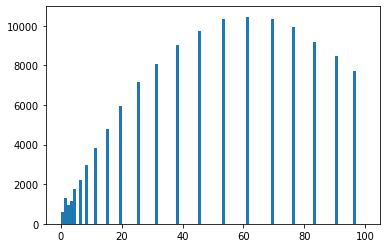

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/My Drive/CVG/Alloy.jpg", 0)
equ = cv2.equalizeHist(img)

plt.hist(equ.flat, bins=100, range=(0,100))


In [3]:
"""
cv2.imshow("Original Image", img)
cv2.imshow("Equalized", equ)
"""


'\ncv2.imshow("Original Image", img)\ncv2.imshow("Equalized", equ)\n'

In [4]:
#Histogram Equalization considers the global contrast of the image, may not give good results.
#Adaptive histogram equalization divides images into small tiles and performs hist. eq.
#Contrast limiting is also applied to minimize aplification of noise.
#Together the algorithm is called: Contrast Limited Adaptive Histogram Equalization (CLAHE)


In [5]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
cl1 = clahe.apply(img)


In [6]:
"""
cv2.imshow("CLAHE", cl1)

cv2.waitKey(0)          
cv2.destroyAllWindows()
""" 


'\ncv2.imshow("CLAHE", cl1)\n\ncv2.waitKey(0)          \ncv2.destroyAllWindows()\n'

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 8.0000e+00, 1.0000e+01, 2.5000e+01,
        2.0400e+02, 7.1400e+02, 9.8600e+02, 1.9820e+03, 1.6940e+03,
        3.0540e+03, 2.7120e+03, 4.8720e+03, 4.1990e+03, 7.6370e+03,
        9.5500e+03, 6.3110e+03, 1.1853e+04, 7.3450e+03, 1.2929e+04,
        7.5990e+03, 1.2193e+04, 7.2010e+03, 1.0710e+04, 6.1820e+03,
        8.6940e+03, 7.3570e+03, 4.0810e+03, 5.5730e+03, 3.0830e+03,
        4.2820e+03, 2.5670e+03, 3.6130e+03, 2.3720e+03, 3.4080e+03,
        3.1200e+03, 2.0170e+03, 3.1570e+03, 2.05

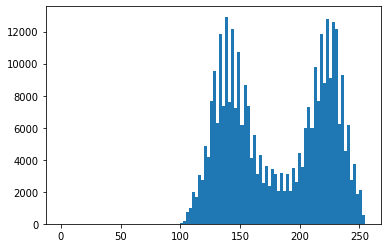

In [7]:
#Image thresholding

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/My Drive/CVG/Alloy.jpg", 0)

#Adaptive histogram equalization using CLAHE to stretch the histogram. 
#Contrast Limited Adaptive Histogram Equalization covered in the previous tutorial. 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
clahe_img = clahe.apply(img)
plt.hist(clahe_img.flat, bins =100, range=(0,255))


In [8]:
#Thresholding. Creates a uint8 image but with binary values.
#Can use this image to further segment.
#First argument is the source image, which should be a grayscale image.
#Second argument is the threshold value which is used to classify the pixel values. 
#Third argument is the maxVal which represents the value to be given to the thresholded pixel.

In [9]:
ret,thresh1 = cv2.threshold(clahe_img,185,150,cv2.THRESH_BINARY)  #All thresholded pixels in grey = 150
ret,thresh2 = cv2.threshold(clahe_img,185,255,cv2.THRESH_BINARY_INV) # All thresholded pixels in white


In [10]:
"""
cv2.imshow("Original", img)
cv2.imshow("Binary thresholded", thresh1)
cv2.imshow("Inverted Binary thresholded", thresh2)
cv2.waitKey(0)          
cv2.destroyAllWindows() 
"""

'\ncv2.imshow("Original", img)\ncv2.imshow("Binary thresholded", thresh1)\ncv2.imshow("Inverted Binary thresholded", thresh2)\ncv2.waitKey(0)          \ncv2.destroyAllWindows() \n'

'\ncv2.imshow("Otsu", th2)\ncv2.waitKey(0)          \ncv2.destroyAllWindows() \n'

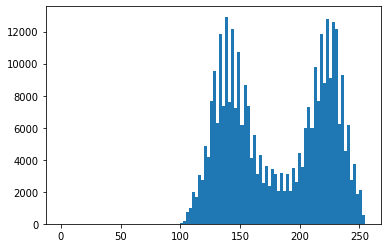

In [13]:
#OTSU Thresholding, binarization
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/My Drive/CVG/Alloy.jpg", 0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
clahe_img = clahe.apply(img)

plt.hist(clahe_img.flat, bins =100, range=(0,255))

# binary thresholding
ret1,th1 = cv2.threshold(clahe_img,185,200,cv2.THRESH_BINARY)

# Otsu's thresholding, automatically finds the threshold point. 
#Compare wth above value provided by us (185)
ret2,th2 = cv2.threshold(clahe_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

"""
cv2.imshow("Otsu", th2)
cv2.waitKey(0)          
cv2.destroyAllWindows() 
"""

# If working with noisy images
# Clean up noise for better thresholding
# Otsu's thresholding after Gaussian filtering. Canuse median or NLM for beteer edge preserving

'\ncv2.imshow("OTSU Gaussian cleaned", th3)\ncv2.waitKey(0)          \ncv2.destroyAllWindows()\n'

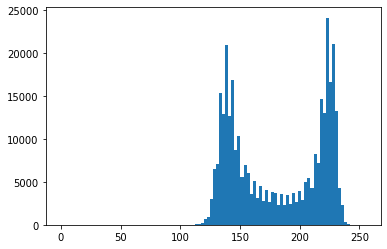

In [14]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/My Drive/CVG/Alloy.jpg", 0)

blur = cv2.GaussianBlur(clahe_img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


plt.hist(blur.flat, bins =100, range=(0,255))
"""
cv2.imshow("OTSU Gaussian cleaned", th3)
cv2.waitKey(0)          
cv2.destroyAllWindows()
""" 